In [6]:
from sklearn import cluster
import pandas as pd


In [159]:
missing_values = ["?"]
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",sep="\,+",header=None,na_values = missing_values)

C:\Users\Anannya Saha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [160]:
data=data.dropna()
data2=data.drop(0,axis=1)
data2=data2.drop(10,axis=1)

In [161]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data2) 
labels = k_means.labels_
pd.DataFrame(labels,  columns=['Cluster ID'])

,Cluster ID
0,1
1,0
2,1
3,0
4,1
...,...
678,1
679,1
680,0
681,0


In [162]:
import numpy as np


In [163]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data2.columns)

,1,2,3,4,5,6,7,8,9
0,7.173913,6.800000,6.734783,5.739130,5.478261,7.930435,6.108696,6.039130,2.569565
1,3.055188,1.298013,1.428256,1.353201,2.094923,1.317881,2.092715,1.260486,1.112583


C:\Users\Anannya Saha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'SSE')

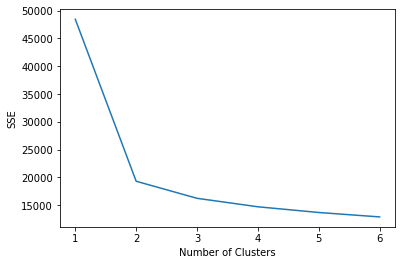

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data2)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [165]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(data2)
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data2.columns)

,1,2,3,4,5,6,7,8,9
0,3.055188,1.298013,1.428256,1.353201,2.094923,1.317881,2.092715,1.260486,1.112583
1,7.173913,6.800000,6.734783,5.739130,5.478261,7.930435,6.108696,6.039130,2.569565


In [166]:

d = k_means.transform(data2)[:, 0]
ind = np.argsort(d)[:5]

In [167]:
ind

array([633, 604, 518,  22, 583], dtype=int64)

In [168]:
d2= k_means.transform(data2)[:, 1]
ind2 = np.argsort(d2)[:5]

In [169]:
ind2

array([452, 194, 225, 155, 610], dtype=int64)

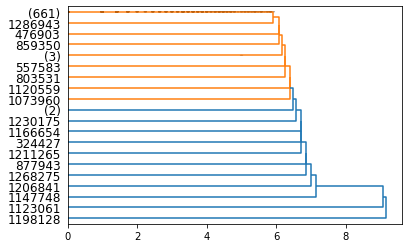

In [170]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

id_num = data[0]

Z = hierarchy.linkage(data2.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=id_num.tolist(),orientation='right',truncate_mode='lastp',p=20,show_contracted=True)

In [171]:
data2

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


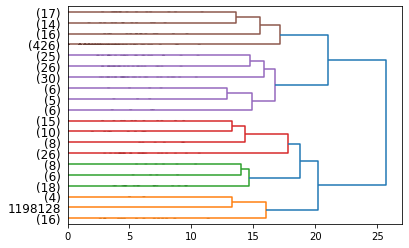

In [172]:
Z = hierarchy.linkage(data2.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=id_num.tolist(),orientation='right',truncate_mode='lastp',p=20,show_contracted=True)

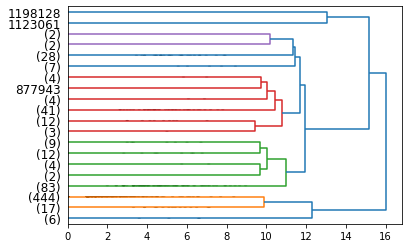

In [173]:
Z = hierarchy.linkage(data2.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=id_num.tolist(),orientation='right',truncate_mode='lastp',p=20,show_contracted=True)

In [ ]:
missing_values = ["?"]
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",sep="\,+",header=None,na_values = missing_values)

In [7]:
import pandas as pd
data_wave = pd.read_csv('waveform.data',sep="\,+",header=None)

C:\Users\Anannya Saha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
data_wave=data_wave.drop(21,axis=1)

Text(0, 0.5, 'SSE')

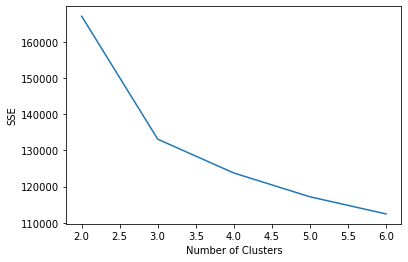

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data_wave)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

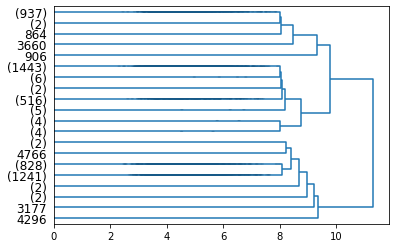

In [10]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline


Z = hierarchy.linkage(data_wave.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,orientation='right',truncate_mode='lastp',p=20,show_contracted=True)

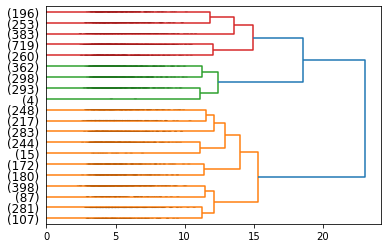

In [11]:
Z = hierarchy.linkage(data_wave.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,orientation='right',truncate_mode='lastp',p=20,show_contracted=True)

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
sys.setrecursionlimit(10000)
data_wave = pd.read_csv('waveform.data',sep="\,+",header=None)
data_wave=data_wave.drop(21,axis=1)
Z = hierarchy.linkage(data_wave.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,orientation='right',truncate_mode='lastp',p=20,show_contracted=True)